In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
# Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship 
# between one or more independent variables and a dependent variable; the method estimates the relationship by 
# minimizing the sum of the squares in the difference between the observed and predicted values of the dependent 
# variable configured as a straight line. In this entry, OLS regression will be discussed in the context of a
# bivariate model, that is, a model in which there is only one independent variable ( X ) predicting a dependent 
# variable ( Y ). However, the logic of OLS regression is easily extended to the multivariate model in which there 
# are two or more independent variables.

In [4]:
data = pd.read_csv(r'C:\Users\Administrator\Class Notebooks\Datasets\Linear Regression\simple-linear-regression.csv')

In [7]:
data.head(20)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


In [3]:
data.head()
# SAT - Critical Reading, Writing & Mathematics
# GPA - Grade point Average at graduation from college
# We want to predict GPA based on SAT score of the students
# SAT is considered one of the best estimators of intellectual capacity & capability
# Most of the colleges in US are using SAT score as a proxy for admission
# SAT leading exam for admission to college

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [6]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [16]:
y = data['GPA']
x1 = data['SAT']

Text(0, 0.5, 'GPA')

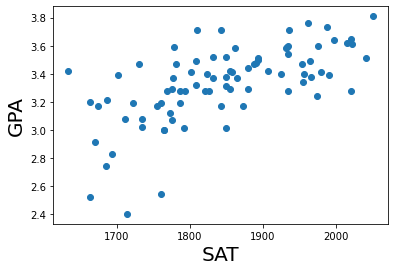

In [17]:
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
# By going through the plot we can see there is a strong relationship between GPA & SAT
# Higher the SAT higher the GPA

<AxesSubplot:xlabel='SAT', ylabel='GPA'>

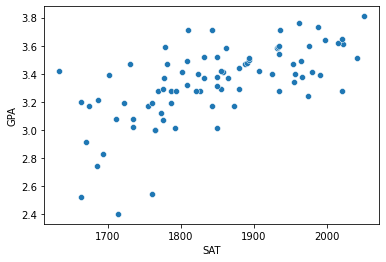

In [18]:
sns.scatterplot(data=data, x = 'SAT', y='GPA')

<AxesSubplot:xlabel='SAT', ylabel='GPA'>

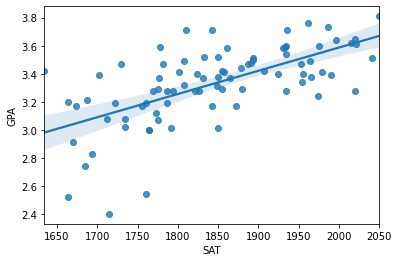

In [19]:
sns.regplot(data=data, x = 'SAT', y='GPA')

In [23]:
x = sm.add_constant(x1)
# Ordinary least squares regression
# Fit method is a estimation technique to obtain fit of the model
results = sm.OLS(y,x).fit()

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           7.20e-11
Time:                        12:28:22   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'GPA')

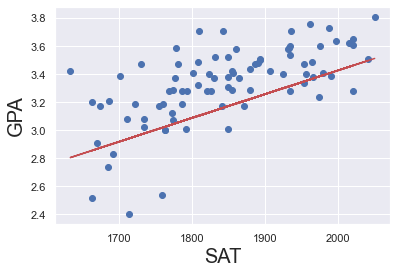

In [31]:
sns.set()
plt.scatter(x1,y)
yhat = 0.0017*x1 +0.0275
fig = plt.plot(x1,yhat, c='r')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

In [32]:
# We have three main tables 
# 1) Model Summary
# 2) Coefficient Table
# 3) Additional Tests 

In [33]:
# yhat = b0+ b1x1
# b0 = 0.275
# b1 = 0.0017
# yhat = 0.275 + 0.0017x1
# GPA = 0.275 + 0.0017SAT

3 stderr - standard error of each variablel. Lower the standard error better the estimates
H0 Null hypothesis is Beta = 0 that is line crosses at the orign
p value below 0.05 is considered significant
coefficient is not be considered for the model
# Tells that SAT is a significant variable for predicting GPA

# 1st Table
Dependent variable - GPA
Model - OLS Ordinary Least Sqares - Most common method to measure the Linear Regression = minimum SSE - Minimum Square Error. 
Lower the error better the model. This model look for line that has minimum SSE. It is the line closest to all the points.
Method - Closely related to least squares
R- Squared = (Variability explained by Regression - SSR)/(Total Variablilty of Dataset SST)
its value range between 0 & 1. 0 means no variablility in the data. 1 means entire variability of data.
In the model SAT explains only 41% variablility of the college grades in our sample. Its far away from 90% accuracy. In case 
we have more variables such as gender, income, marital status etc might understand the full picture. 
Gender could pay an important role or Home Income also pays an important role as if home income is not good then you might have
to take up part time job and might impact the grades. If you are married & have child then also it may impact your grades
R Squared measures the goodness of fit in the model, the more factors (variables) you include in your model higher the R squared


In [34]:
# SKLEARN

In [36]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [53]:
# Dependent & Independent Variables
X = data['SAT']
y = data['GPA']

In [54]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [55]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
# Creating a Linear Regression Object
lm = LinearRegression()

In [58]:
# Training or fit the model
# Training my training data
lm.fit(X_train, y_train)

LinearRegression()

In [59]:
# R Squared
lm.score(X_train, y_train)

0.3362518769214591

In [60]:
# Coefficients
lm.coef_

array([[0.0014124]])

In [61]:
lm.intercept_

array([0.73155146])

In [63]:
lm.predict(X_test)

array([[3.25551148],
       [3.35437952],
       [3.35155472],
       [3.21031465],
       [3.08037379],
       [3.58601323],
       [3.16370543],
       [3.45042277],
       [3.3105951 ],
       [3.17500464],
       [3.23008826],
       [3.3077703 ],
       [3.21737666],
       [3.14958142],
       [3.36002913],
       [3.22302626],
       [3.50268159],
       [3.23856267],
       [3.23573787],
       [3.38545234],
       [3.46313438],
       [3.21878906],
       [3.42499956],
       [3.3035331 ],
       [3.39675154],
       [3.11144661],
       [3.5083312 ],
       [3.27669749],
       [3.46595918],
       [3.5196304 ],
       [3.31906951],
       [3.08178619],
       [3.49138239],
       [3.62697285]])

# Multiple Linear Regression

#### R Squared

- The R Squared - Measures how much of the total variablility is explained by the model. 
- R2 also tells you how good is your regression line compared to your average line.
- R2 will increase by adding a new variables. 
- Multiple regressions are always better than simple linear regression as with each additional variable you add, the 
- explainatory power may only increase or remain the same



#### Adj R Squared
- Adj R2 < R2
- The adj R Squared penalises excessive use of variables that do not help the model

In [66]:
datam = pd.read_csv('datasets/Linear Regression/SAT_GPA_Rank.csv')

In [67]:
datam.head()

,SAT,Rank,GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [70]:
# In this data we have one extra column rank that is randomly generated and has nothing to do with the GPA. Means this
# new variable can not be used to predict the GPA
# GPA = b0 + b1*SAT +b2*Ranks

In [71]:
datam.describe()

,SAT,Rank,GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [72]:
# Creating 1st multiple Linear Regression

In [73]:
y = datam['GPA']
x1 = datam[['SAT','Rank']]

In [74]:
x = sm.add_constant(x1)
# Ordinary least squares regression
# Fit method is a estimation technique to obtain fit of the model
results = sm.OLS(y,x).fit()

In [75]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           6.58e-10
Time:                        07:57:02   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rank          -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
# By looking and comparing above two summary tables we can say 
# Rsquared increases or expainatory power increased but
# Adj R squared decreased as by adding new variables that doesnot help the model or has no strong explainatory power os
# system penalised it. We added information but have lost value

In [77]:
# As per the null hypothesis we say 
# H0 = Beta2 is = 0 that is new added variable is not adding any value to the model
# as p score is 0.762 that is way to high than 0.05 so we can't reject null hypothesis
# We want coeeficient to be relevant to have p value less than 0.05
# We not only worsen the model by adding rank but also it is insignificant to have it 
# yhat2 = 0.296  + 0.0017x1 - 0.0083x2
# yhat1 = 0.275 + 0.0017x1
# in the 2nd model the bias of the new variable is reflected into the coefficient of the others so whould should not use this 
# variable in the model

#  F Statistics
 - The F - Statistics is used for testing the overall significance of the model

In [79]:
# H0 = Null Hypothesis is beta1 = beta2 = .....betan = 0
# H1 - alternate hypothesis is atleast one beta is not zero
# If all betas are zero than none of the X or variables matter. that means our model has no merit


In [80]:
# For our linear model the F statistics is 56.05 and p value is prob(F statistics) is very very less - 7.2e-11 almost = 0
# p value is almost zero hence we see the model is significant

In [81]:
# For our multiple linear regression F statistics is 27.76 and p value prob (f statistics) 6.58e-10 = 0
# HEre F statistics is less compared to eariler but model is significant but less compared to the simple linear model
# the lower the F Statistics  the closer to a non significant  model

# Assumptions 
- Linearity = y = b0 + b1x1 + b2x2 + .....bnxn
- No Endogeneity 
- Normality & homoscedasticity
- No autocorrelation
- No multicollinearty


In [82]:
data_d = pd.read_csv('datasets\dummy/dummies.csv')

In [84]:
data_d['Attendance'] = data_d['Attendance'].map({'Yes':1, 'No':0})

In [85]:
y = data_d['GPA']
x1 = data_d[['SAT','Attendance']] 

In [86]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [87]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           2.19e-15
Time:                        17:50:20   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
# - GPA = 0.6439 + 0.0014*SAT + 0.2226*Dummy
# - if dummy = 0
# - GPA = 0.6439 + 0.0014*SAT + 0.2226*0
# - GPA = 0.6439 + 0.0014*SAT
# - if student attended dummy = 1
# - GPA = 0.6439 + 0.0014*SAT + 0.2226*1
# - GPA = 0.6439 + 0.0014*SAT + 0.2226
# - GPA = 0.8665 +  0.0014*SAT


Text(0, 0.5, 'GPA')

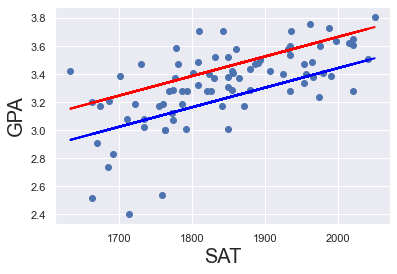

In [89]:
plt.scatter(data_d['SAT'],y)
yhat_no = 0.6439 + 0.0014*data_d['SAT']
yhat_yes = 0.8665 +  0.0014*data_d['SAT']
fig = plt.plot(data['SAT'],yhat_no,lw = 2, c = 'blue')
fig = plt.plot(data['SAT'],yhat_yes,lw = 2, c = 'red')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

In [90]:
# Both have the same slope but different intercept
# on average students who attended teh class has GPA  0 .2226 higher than students who have not attended

Text(0, 0.5, 'GPA')

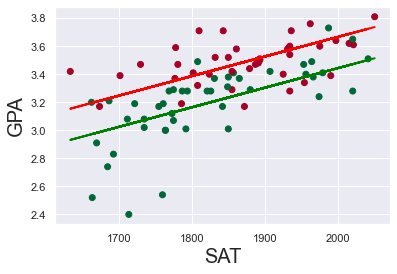

In [94]:
plt.scatter(data_d['SAT'],y, c = data_d['Attendance'],cmap = 'RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data_d['SAT']
yhat_yes = 0.8665 +  0.0014*data_d['SAT']
fig = plt.plot(data['SAT'],yhat_no,lw = 2, c = 'green')
fig = plt.plot(data['SAT'],yhat_yes,lw = 2, c = 'red')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

In [95]:
# Making predictions
new_data = pd.DataFrame({'const':1, 'SAT':[1700, 1670], 'Attendance':[0,1]})
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [98]:
nd = new_data.rename(index = {0:'Bob',1:'Alice'})

In [97]:
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [99]:
nd

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [102]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [103]:
predicitons_df = pd.DataFrame({'Predictions':predictions})
predicitons_df

,Predictions
0,3.023513
1,3.204163


In [104]:
joined = new_data.join(predicitons_df)

In [105]:
joined

,const,SAT,Attendance,Predictions
0,1,1700,0,3.023513
1,1,1670,1,3.204163


In [106]:
joined.rename(index  = {0:'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


# Linear Regression using SKLEARN

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [109]:
data = pd.read_csv('datasets\linear regression\simple-linear-regression.csv')

In [110]:
x = data['SAT']
y = data['GPA']

In [116]:
x = x.values.reshape(-1,1)

In [117]:
# lm is the instance of the regression class
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

# Getting RSquared 

In [119]:
lm.score(x,y)
# Exactly this is what we got using stats models

0.40600391479679765

# Getting Coefficients

In [120]:
lm.coef_
# Exactly what we got using stats models

array([0.00165569])

# Intercept

In [121]:
lm.intercept_

0.2750402996602803

# Making Predicitons

In [127]:
test_data = pd.DataFrame(data = [1740,1760,1300], columns=['SAT'])
test_data

,SAT
0,1740
1,1760
2,1300


In [128]:
lm.predict(test_data)

array([3.15593751, 3.18905127, 2.42743476])

In [129]:
test_data['Predcited_GPA'] = lm.predict(test_data)

In [130]:
test_data

,SAT,Predcited_GPA
0,1740,3.155938
1,1760,3.189051
2,1300,2.427435


Text(0, 0.5, 'GPA')

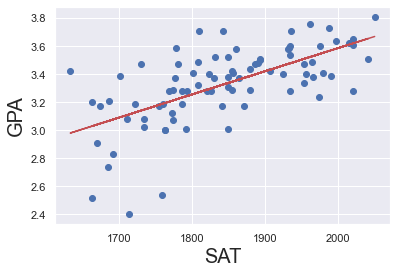

In [131]:

plt.scatter(x,y)
yhat = lm.coef_*x+lm.intercept_
#yhat = 0.0017*x1 +0.0275
fig = plt.plot(x,yhat, c='r')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

# Multiple Linear Regression

In [132]:
datam = pd.read_csv('datasets/Linear Regression/SAT_GPA_Rank.csv')

In [133]:
datam.head()

,SAT,Rank,GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [134]:
datam.describe()

,SAT,Rank,GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


# Dependent & Independent variables

In [135]:
y = datam['GPA']
x = datam[['SAT','Rank']]

In [137]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [138]:
lm.coef_

array([ 0.00165354, -0.00826982])

In [139]:
lm.intercept_

0.29603261264909486

In [140]:
# REsults using sklearn & stats model both give identical results

# R Squared & Adj R Squared
 - The R Squared is a universal measure to evaluate how well the linear regression is

In [141]:
lm.score(x,y)

0.40668119528142843

In [142]:
# Adjusted R Squared = 1 – [((1 – R2) * (n – 1)) / (n – k – 1)]
# n – Number of points in your data set.
# k – Number of independent variables in the model, excluding the constant

In [145]:
x.shape

(84, 2)

In [146]:
r2 = lm.score(x,y)
n = x.shape[0]
k = x.shape[1]
# n = 84
# k = 2

In [148]:
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-k-1)

In [149]:
adjusted_r2

0.39203134825134023

# Calculating RMSE - 

In [150]:
from sklearn.metrics import mean_squared_error

In [151]:
# MSE = mean_squared_error(y_actual, y_predicted)

In [152]:
# RMSE = np.sqrt(MSE)
# print("Root Mean Square Error:\n")
# print(RMSE)
# Usually, a RMSE score of less than 180 is considered a good score for a moderately or well working algorithm.
# In case, the RMSE value exceeds 180, we need to perform feature selection and hyper parameter tuning on the 
# parameters of the model.



In [153]:
# How to detect the variables that are un needed in the model
# Using Feature selection we can determine which all variables to take care when building model

In [154]:
# Feature_selection.f_regression
# F_regression creates simple linear regressions of each feature & the dependent variable

In [155]:
from sklearn.feature_selection import f_regression

In [156]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [157]:
# 1st array gives us F Statistics 
# 2nd gives the P value

In [158]:
# Generally we are more interested in p value

In [160]:
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [161]:
# to get rid of scientific notation
p_values.round(3)

array([0.   , 0.676])

In [162]:
# so p value for SAT is 0  - SAT is significant
# p value for Rank is 0.676 - Rank is not significant

# Creating Summary Tables

In [164]:
reg_summary = pd.DataFrame(data = x.columns.values, columns = ['Features'])
reg_summary

,Features
0,SAT
1,Rank


In [165]:
reg_summary['Coefficients'] = lm.coef_
reg_summary['p-values'] = p_values.round(3)

In [166]:
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,Rank,-0.008270,0.676


In [167]:
# by looking at the p value we can say that rank is not contributing to the model and should be removed
# p values are on eof the best ways to determine whether the variable is redundant. But but htey provide no
# information whatsoever about how useful a variable is

# Standardization
ALso called Feature scaling 
 - The process of transforming data into a standard scale
  - (X - mean)/standard Dev.

In [168]:
# StandardScaler() is a preprocessing module used to scale data

In [169]:
from sklearn.preprocessing import StandardScaler

In [170]:
scaler = StandardScaler()

In [171]:
# This line will calculate & store mean & standard deviaiton
scaler.fit(x)

StandardScaler()

In [172]:
# Transform method is used to transform the variables
# StandardScaler.Transform(x) is used to transform the unscaled inputs using the information contained in the scaler object
# feature-wise

In [173]:
x_scaled = scaler.transform(x)

In [174]:
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

In [175]:
lm = LinearRegression()
lm.fit(x_scaled,y)

LinearRegression()

In [176]:
lm.coef_

array([ 0.17181389, -0.00703007])

In [177]:
lm.intercept_

3.330238095238095

In [182]:
reg_summary = pd.DataFrame([['Bias'],['SAT'],['Rank']], columns = ['Features'])
reg_summary['Weights'] = lm.intercept_, lm.coef_[0],lm.coef_[1]  

In [183]:
# Weights are the machine lerning term for coefficients
# Bigger the weight bigger the impact of feature on the model
# Bias is the machine learning term for the intercept
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,Rank,-0.007030


In [184]:
# Making Prediciton with the standardised coefficients ( Weights )

In [185]:
test_data = pd.DataFrame([[1700,2],[1800,1]], columns = ['SAT','Rank'])
test_data

,SAT,Rank
0,1700,2
1,1800,1


In [187]:
# lm.predict(test_data)
# We need to scale our test as well

array([295.39979563, 312.58821497])

In [188]:
test_scaled = scaler.transform(test_data)
test_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [189]:
lm.predict(test_scaled)

array([3.09051403, 3.26413803])